In [1]:
import glob
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_path = "C:/Users/line/Desktop/stitch and perspective/imgs"

In [3]:
save_img_path = "../imgs/perspective/"

In [66]:
csv = pd.read_csv('2023_11_10.csv')

In [116]:
df = csv.copy()

In [121]:
df.head()

,n,x,y,r
0,1,0.0,0.0,0.0
1,2,0.0,0.9,0.0
2,3,0.0,1.8,0.0
3,4,0.0,2.7,0.0
4,5,0.0,3.6,0.0


In [90]:
df = df.drop(columns=['n'])

In [126]:
df.columns

Index(['n', 'x', 'y', 'r'], dtype='object')

In [122]:
df.dtypes

n      int64
x    float64
y    float64
r    float64
dtype: object

In [138]:
df['x'] = pd.to_numeric(df['x']) * 1000

In [139]:
df['y'] = pd.to_numeric(df['y']) * 1000

In [140]:
df

,n,x,y,r
0,1,0.0,0.0,0.0
1,2,0.0,900.0,0.0
2,3,0.0,1800.0,0.0
3,4,0.0,2700.0,0.0
4,5,0.0,3600.0,0.0
...,...,...,...,...
117,118,9355.0,2846.0,180.0
118,119,9355.0,1946.0,180.0
119,120,9805.0,1046.0,180.0
120,121,9805.0,146.0,180.0


In [141]:
df.dtypes

n      int64
x    float64
y    float64
r    float64
dtype: object

In [6]:
img_list = [cv.resize(cv.imread(file),(1080,1440)) for file in glob.glob(f'{img_path}/*.jpg')]

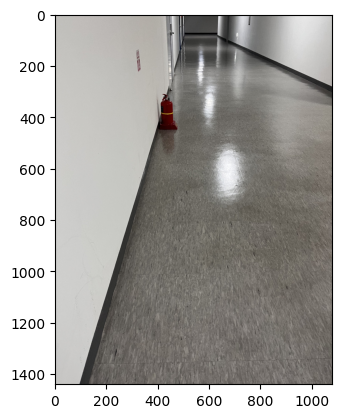

In [7]:
plt.imshow(cv.cvtColor(img_list[1], cv.COLOR_BGR2RGB))

In [8]:
len(img_list)

15

In [42]:
height, width, channels = result.shape

In [43]:
channels

3

In [44]:
for i in range(len(img_list)):
    cv.imwrite(f'{save_img_path}PR{i+1}.jpg',img_list[i])

In [12]:
input_row, input_cols =map(int, input("enter row,cols size in here:").split())

In [45]:
canvas = np.zeros((input_row,input_cols,3),dtype="uint8") + 255

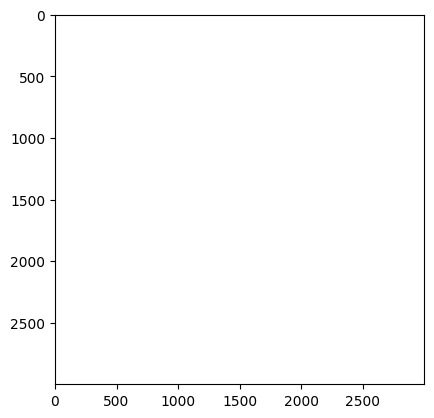

In [46]:
plt.imshow(canvas)

In [106]:
x_offset , y_offset = df['x'][0],df['y'][1]

In [111]:
canvas[y_offset:y_offset+height,x_offset:x_offset+width] = result

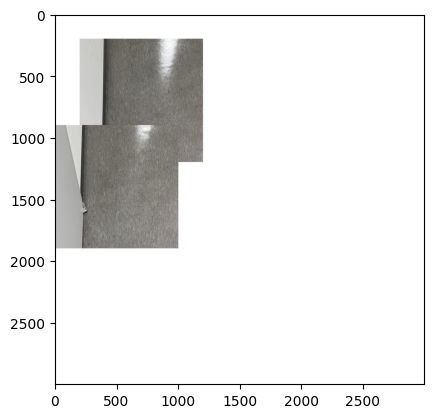

In [112]:
plt.imshow(cv.cvtColor(canvas, cv.COLOR_BGR2RGB))

In [18]:
tl = (240,585)    #좌상
tr = (810,585)    #우상
br = (1050,1010)  #우하
bl = (40,1010)  #좌하

In [37]:
val = 1000

In [38]:
pts1 = np.float32([tl,tr,br,bl])
pts2 = np.float32([[0,0],[val-1,0],[val-1,val-1],[0,val-1]])

In [39]:
matrix = cv.getPerspectiveTransform(pts1,pts2)

In [109]:
result = cv.warpPerspective(img_list[-2],matrix,(val,val))

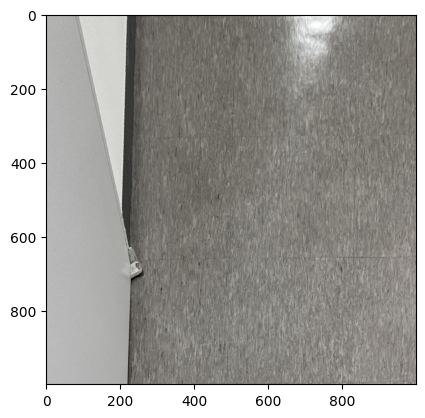

In [110]:
plt.imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB))